In [1]:
%load_ext autoreload
%autoreload 1

import sys
import os

# This adds 'code/' to sys.path
code_dir = os.path.abspath(os.path.dirname(__file__)) if '__file__' in globals() else os.path.abspath('')
if code_dir not in sys.path:
    sys.path.append(code_dir)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%aimport methods.resampling
from methods.resampling import BiasVariance
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [3]:
# Defining the Runge function
def f(x):
    return 1/(1+25*x**2)

In [4]:
# Generate data
np.random.seed(124)
n = 100

x = np.linspace(-1, 1, n)
y = f(x) + 0.05*np.random.normal(0, 1, n)

## Bootstrap MSE vs. Cross-Validation MSE for OLS, Ridge, and Lasso

In [5]:
max_degree = 50
bias_variance_analyzer = BiasVariance(x,y, max_degree=max_degree)

n_bootstraps = 100
k_folds = 10

lambda_ridge = 1e-2
lambda_lasso = 1e-2

models = [
    ("OLS", LinearRegression(fit_intercept=False), 'C0'),
    ("Ridge", Ridge(fit_intercept=False, alpha=lambda_ridge, max_iter=2000), 'C1'), # Increased max_iter to ensure convergence
    ("Lasso", Lasso(fit_intercept=False, alpha=lambda_lasso, max_iter=2000), 'C2'),
]

bootstrap_mse_values = []
cross_validation_mse_values = []
for name, model, color in models:
    bias_variance_analyzer.model = model
    bootstrap_mse = bias_variance_analyzer.bootstrap(n_bootstraps=n_bootstraps)[0]
    cross_validation_mse = bias_variance_analyzer.k_fold_cross_validation(k_folds)
    bootstrap_mse_values.append(bootstrap_mse)
    cross_validation_mse_values.append(cross_validation_mse)

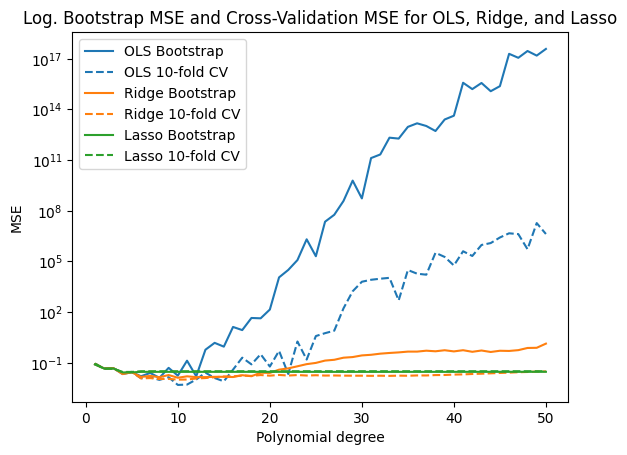

In [ ]:
# Plot of OLS, Ridge, and Lasso
for i, (name, model, color) in enumerate(models):
    plt.plot(range(1,max_degree+1), bootstrap_mse_values[i], color=color, label=f"{name} Bootstrap")
    plt.plot(range(1,max_degree+1), cross_validation_mse_values[i], "--", color=color, label=f"{name} {k_folds}-fold CV")

plt.yscale("log")
plt.legend()
plt.title("Log. Bootstrap MSE and Cross-Validation MSE for OLS, Ridge, and Lasso")
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
# plt.savefig("../figs/bootstrap_cv_mse.pdf")
plt.show()